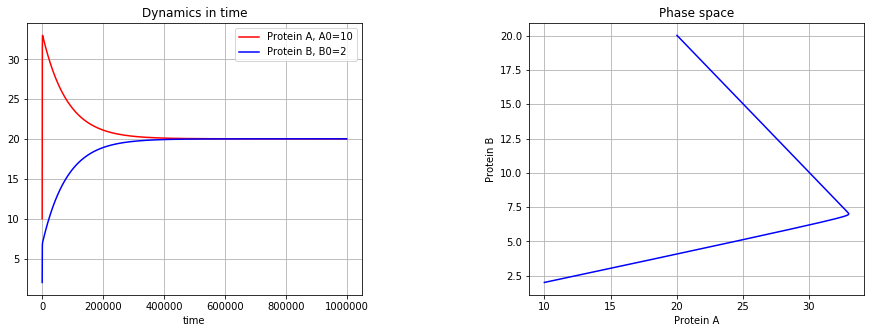

In [9]:
# Group 1: Youssaf, Triet, Michael, Mohammad

#Group 1 You will analyze the deterministic version of the genetic switch system described in section
#III of the paper by Loinger, et al. (the one discussing the stochastic genetic switch). The
#differential equation is given in Eq. (9).
# 1/ Construct a Petri net representation of the system based on the description in the text
#(you can also consider the master equation given in the same section). How does the
# 2/ ODE relate to this representation? Why is this called an exclusive switch?
# 3/ Solve the ODE numerically and show the different trajectories in the phase plane.
#Coordinate with Group 2 on the parameters { use the ones in the paper. The nullclines
#are the solution to the equations A0 = 0 and B0 = 0. As discussed in the paper by
#Gardner, et al. they determine the behavior of the deterministic system (See Fig. 2).
#Perform the equivalent analysis for the system in Eq. (9).
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# define system in terms of a Numpy array
alpha0=0.2
alpha1=0.01
k=alpha0/alpha1
g=0.2
d=0.005
def Sys(X, t=0):
    """ The rate equations that describe the BRD switch, """
    # here X[0] = [A] and x[1] = [B]    
    return np.array([ g/(1+k*X[1]/(1+k*X[0]))-d*X[0] , g/(1+k*X[0]/(1+k*X[1]))-d*X[1]])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 1000000,  1000000)
# initial values: A0 = 10, B0 = 2
Sys0 = np.array([10, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='Protein A, A0=10')
ax1.plot(y, 'b-', label='Protein B, B0=2')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("Protein A")
ax2.set_ylabel("Protein B")  
ax2.set_title("Phase space")
ax2.grid()

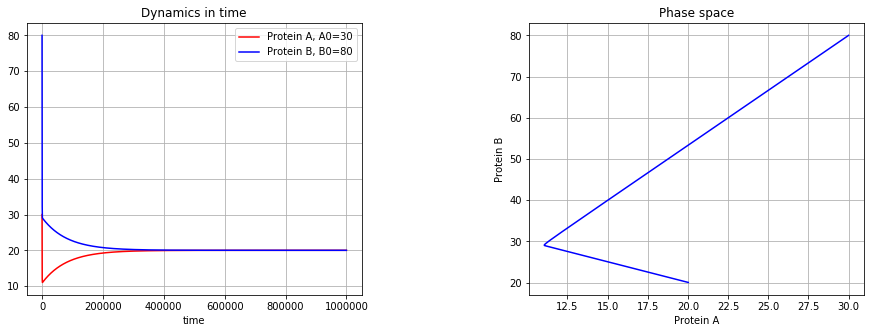

In [10]:
# initial values: A0 = 30, B0 = 80
Sys0 = np.array([30, 80])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='Protein A, A0=30')
ax1.plot(y, 'b-', label='Protein B, B0=80')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("Protein A")
ax2.set_ylabel("Protein B")  
ax2.set_title("Phase space")
ax2.grid()

In [5]:
import sympy as sm
# define the Chemical reaction system 
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = g/(1+k*c/(1+k*r))-d*r
C = g/(1+k*r/(1+k*c))-d*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(20.0249377333062, 20.0249377333062)]


In [25]:
x = np.arange(0,50,0.2)
y = np.arange(0,50,0.2)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

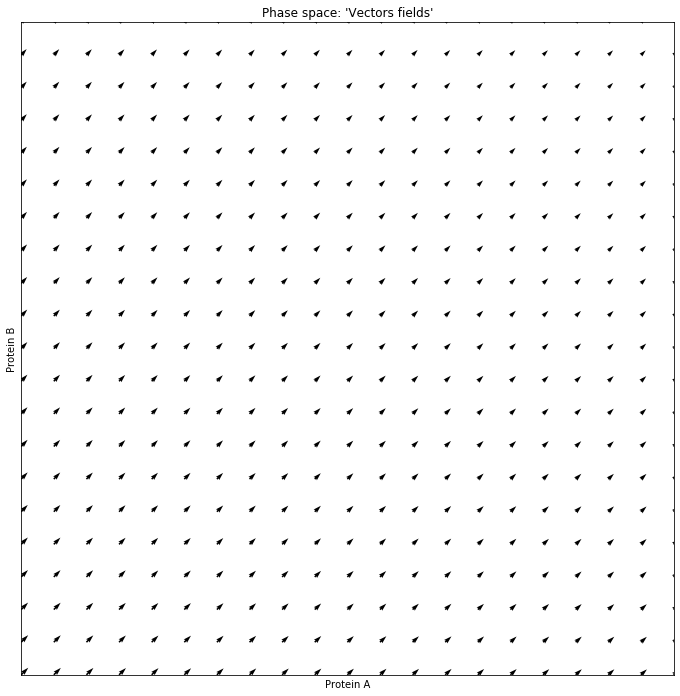

In [84]:
x = np.arange(0,30,np.pi/10)
y = np.arange(0,50,np.pi/10)

X,Y = np.meshgrid(x,y)

u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y

fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([0,2*np.pi,0,2*np.pi])
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")
plt.show()

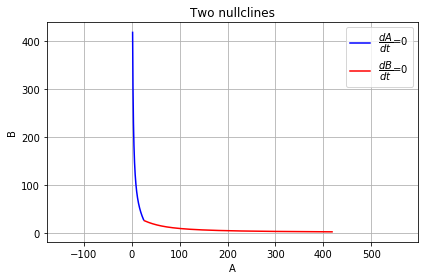

In [78]:
#plotting two nullclines
#print("k= ",k)
k=0.05
fig3, ax3 = plt.subplots(1, 1)
A=  np.linspace(2, 25,  1000)
B=  A
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
ax3.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax3.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
plt.legend(loc='best')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Two nullclines')
plt.grid()
plt.axis('equal')
plt.tight_layout()
plt.savefig('challenge_4.png')
plt.show()

In [51]:
import math
%matplotlib inline
values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory
A0=((k*g-d)+math.sqrt((k*g+d)**2+4*k*g*d))/(4*k*d)
X_f1=np.array([A0,A0])
f2 = plt.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( Sys, X0, t)         # we don't need infodict here
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = Sys([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
plt.xlabel('Protein A')
plt.ylabel('Protein B')
plt.legend()
pltgrid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)

AxisError: axis -1 is out of bounds for array of dimension 0

<Figure size 432x288 with 0 Axes>